<a href="https://colab.research.google.com/github/Dhvani35729/Bite-Club-Landing-Site/blob/master/fastai1_lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
folder = 'burger' 
file = 'burger.txt'

In [ ]:
folder = 'hotdog' 
file = 'hotdog.txt'

In [ ]:
folder = 'burrito' 
file = 'burrito.txt'

In [ ]:
path = Path('data/food')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
 download_images(dest/file, dest, max_pics=200)

In [ ]:
path.ls()

[PosixPath('data/food/burrito'),
 PosixPath('data/food/hotdog'),
 PosixPath('data/food/burger')]

In [ ]:
classes = ['burrito','hotdog','burger']

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

burrito


hotdog


burger


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [ ]:
data.classes

['burger', 'burrito', 'hotdog']

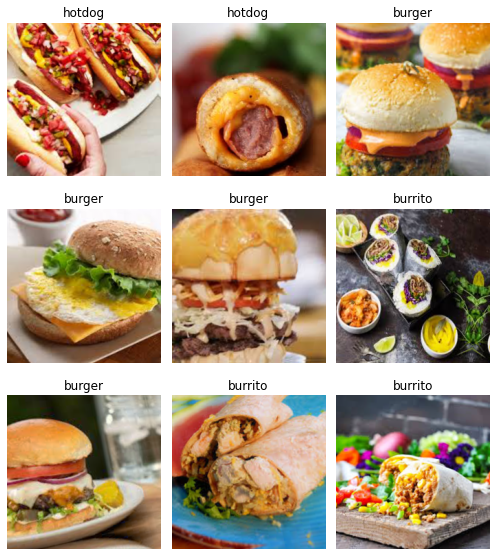

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['burger', 'burrito', 'hotdog'], 3, 480, 120)

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.512979,0.504673,0.158333,00:05
1,0.880181,0.288893,0.091667,00:04
2,0.619291,0.254763,0.091667,00:04
3,0.490917,0.253322,0.091667,00:05


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


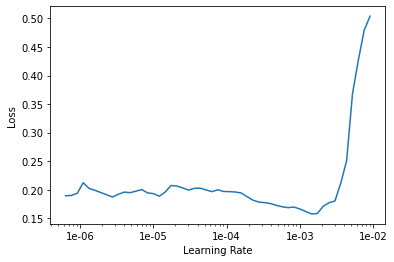

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.228353,0.267152,0.100000,00:05
1,0.172012,0.300842,0.108333,00:05


In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.182622,0.229780,0.058333,00:05
1,0.140800,0.211204,0.058333,00:05


In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.075810,0.167498,0.041667,00:05
1,0.064460,0.151917,0.033333,00:05


In [31]:
learn.save('stage-2')

In [32]:
learn.load('stage-2');

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

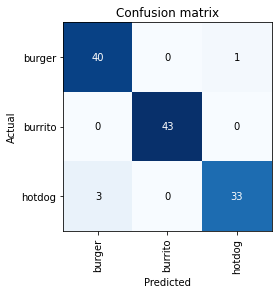

In [34]:
interp.plot_confusion_matrix()

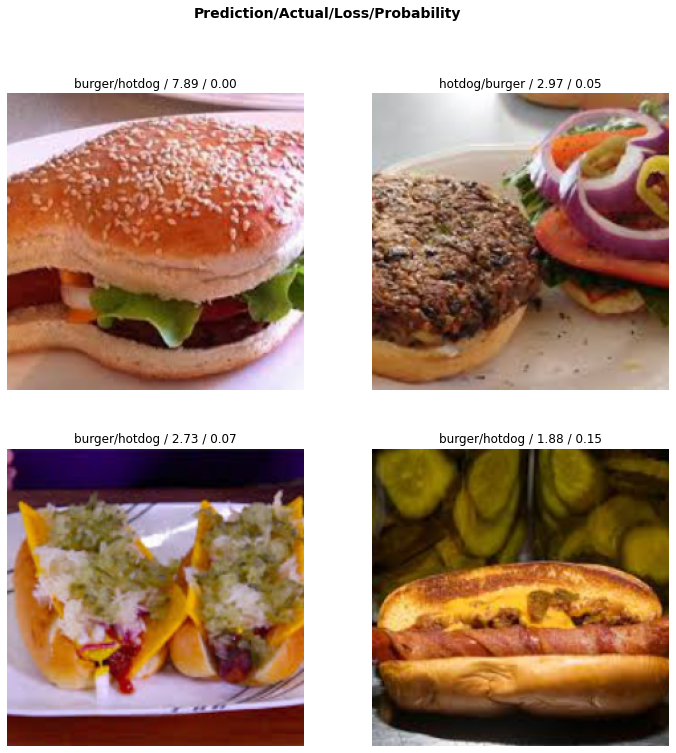

In [36]:
interp.plot_top_losses(4)

In [37]:
learn.export()